In [56]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import matplotlib
import seaborn as sns

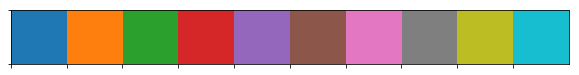

In [57]:
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams["font.size"] = 26

cp = sns.color_palette()
sns.palplot(cp)
plt.show()

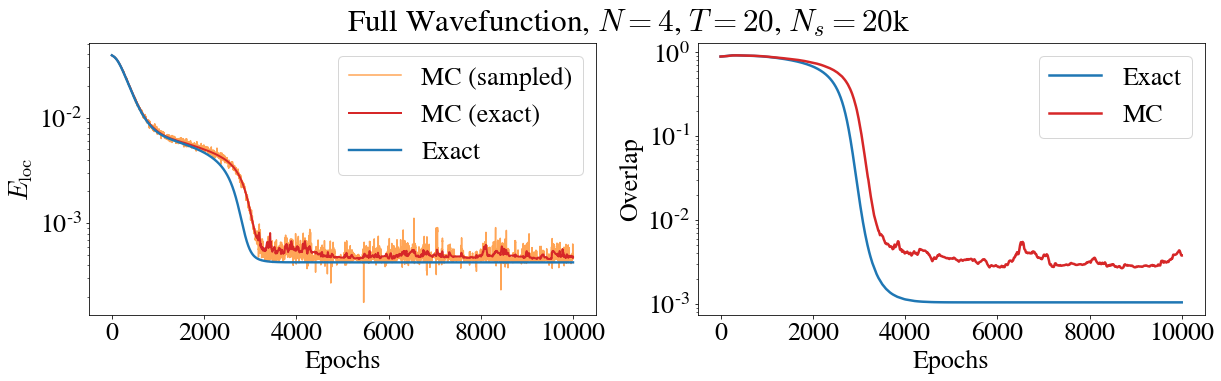

In [54]:
machine_type = "fullwv"
title_type = "Full Wavefunction"
n_sites = 4
time_steps = 20
n_samples = 20000

all_states = h5py.File("histories/allstates_{}_N{}M{}.h5py".format(machine_type, n_sites, time_steps), "r")
sampling = h5py.File("histories/sampling{}_{}_N{}M{}.h5py".format(n_samples, machine_type, n_sites, time_steps), "r")

plt.figure(figsize=(20, 5))
plt.suptitle("{}, $N={}$, $T={}$, $N_s={}$k".format(title_type, n_sites, time_steps, n_samples//1000))

plt.subplot(121)
plt.semilogy(sampling["sampled_Eloc"][:].real, label="MC (sampled)", color=cp[1], alpha=0.7)
plt.semilogy(sampling["exact_Eloc"][:].real, label="MC (exact)", color=cp[3], linewidth=2.0)
plt.semilogy(all_states["exact_Eloc"][:].real, label="Exact", color=cp[0], linewidth=2.4)
plt.xlabel("Epochs")
plt.ylabel("$E_\mathrm{loc}$")
plt.legend()

plt.subplot(122)
plt.semilogy(1 - all_states["overlaps"][:], label="Exact", linewidth=2.5, color=cp[0])
plt.semilogy(1 - sampling["overlaps"][:], label="MC", linewidth=2.5, color=cp[3])
plt.xlabel("Epochs")
plt.ylabel("Overlap")
plt.legend()
plt.show()

all_states.close()
sampling.close()

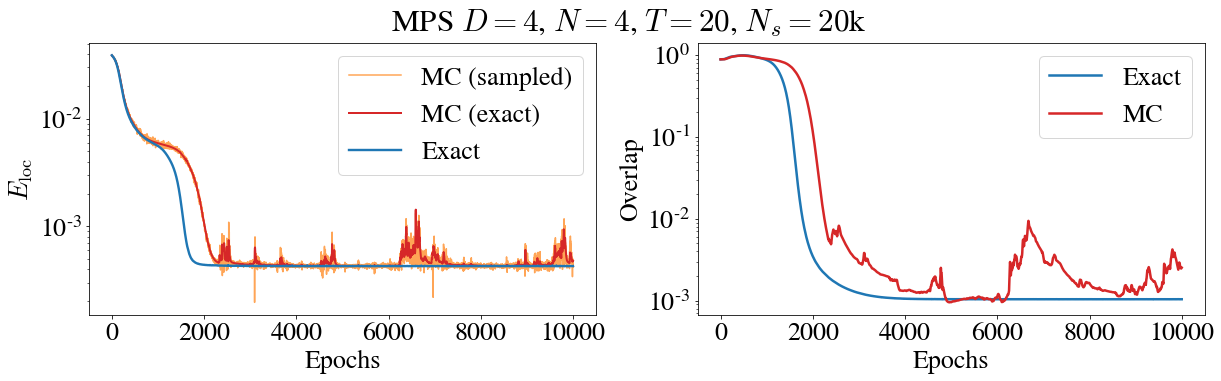

In [58]:
machine_type = "mpsD4"
title_type = "MPS $D=4$"
n_sites = 4
time_steps = 20
n_samples = 20000

all_states = h5py.File("histories/allstates_{}_N{}M{}.h5py".format(machine_type, n_sites, time_steps), "r")
sampling = h5py.File("histories/sampling{}_{}_N{}M{}.h5py".format(n_samples, machine_type, n_sites, time_steps), "r")

plt.figure(figsize=(20, 5))
plt.suptitle("{}, $N={}$, $T={}$, $N_s={}$k".format(title_type, n_sites, time_steps, n_samples//1000))

plt.subplot(121)
plt.semilogy(sampling["sampled_Eloc"][:].real, label="MC (sampled)", color=cp[1], alpha=0.7)
plt.semilogy(sampling["exact_Eloc"][:].real, label="MC (exact)", color=cp[3], linewidth=2.0)
plt.semilogy(all_states["exact_Eloc"][:].real, label="Exact", color=cp[0], linewidth=2.4)
plt.xlabel("Epochs")
plt.ylabel("$E_\mathrm{loc}$")
plt.legend()

plt.subplot(122)
plt.semilogy(1 - all_states["overlaps"][:], label="Exact", linewidth=2.5, color=cp[0])
plt.semilogy(1 - sampling["overlaps"][:], label="MC", linewidth=2.5, color=cp[3])
plt.xlabel("Epochs")
plt.ylabel("Overlap")
plt.legend()
plt.show()

all_states.close()
sampling.close()